In [1]:
import numpy as np
from timebudget import timebudget
from cplAE_snmCAT.utils.load_config import load_config
from cplAE_snmCAT.utils.proc import proc_dataset_v2, read_dataset_v2
from cplAE_snmCAT.utils.plots import discrete_to_color

import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks")

In [ ]:
with timebudget('pre-processing:'):
    T, E, M, data = proc_dataset_v2(write=True)

In [2]:
T, E, M, data  = read_dataset_v2()

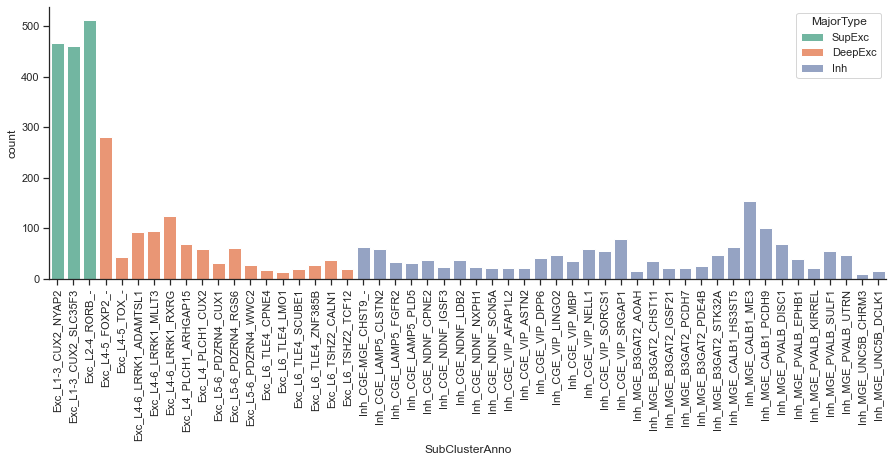

In [3]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine()
sns.countplot(data=M.sort_values(by='SubClusterAnno'), x="SubClusterAnno", hue="MajorType", dodge=False,
              order=np.sort(M['SubClusterAnno'].unique()), palette="Set2", ax=ax, **{'linewidth':1})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

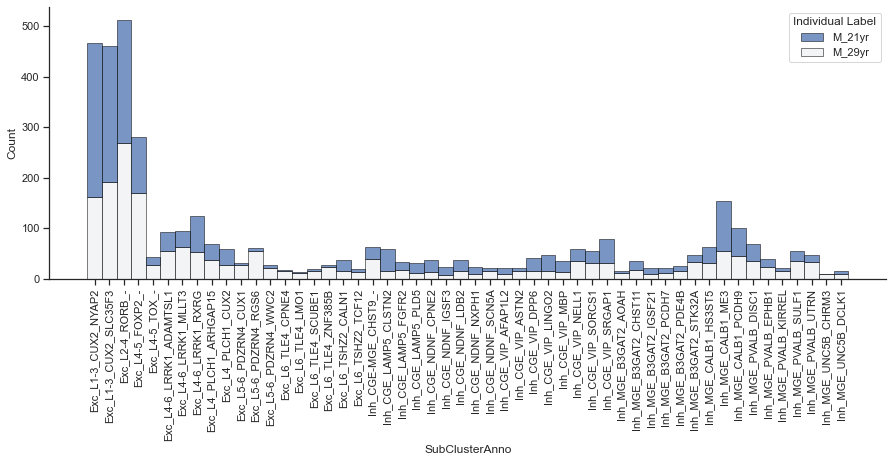

In [4]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine()
sns.histplot(data=M.sort_values(by='SubClusterAnno'),x="SubClusterAnno", hue="Individual Label", 
             multiple="stack",palette="light:b_r",edgecolor="0",linewidth=.5)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [5]:
unique_labels = np.unique(M['ClusterAnno'].values)
unique_cols = discrete_to_color(unique_labels, label_order=unique_labels)


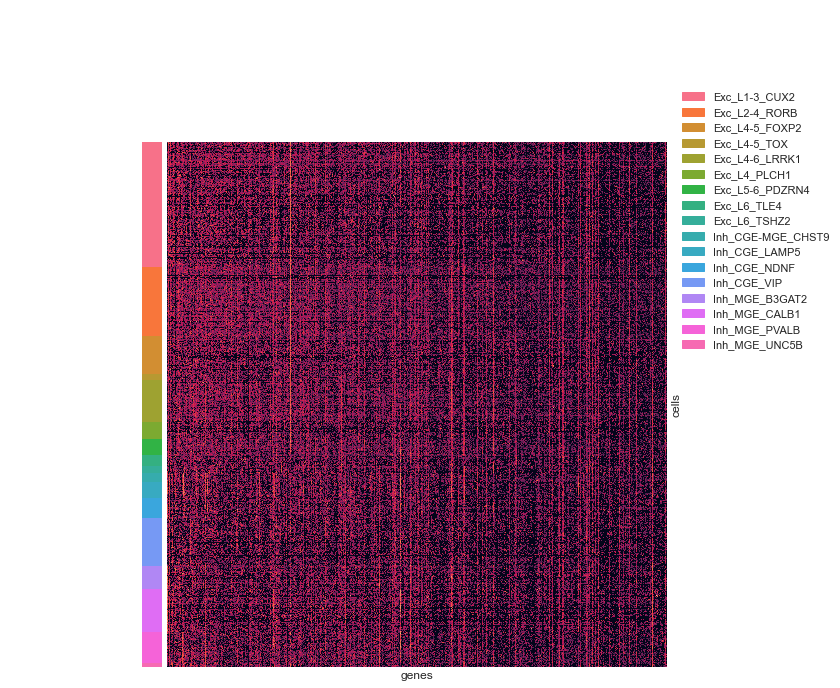

In [6]:
ngenes = 4000
g = sns.clustermap(data=T[data['sorted_highvar_T_genes']].values[:, 0:ngenes],
                   row_cluster=False,
                   col_cluster=False,
                   row_colors=discrete_to_color(M['ClusterAnno'], label_order=unique_labels),
                   vmin=0, vmax=12, cbar_pos=None, **{'square': False})

legend_TN = [mpatches.Patch(color=c, label=l) for c,l in zip(unique_cols, unique_labels)]
g.ax_heatmap.legend(loc='center left', 
                    bbox_to_anchor=(1.01, 0.85), 
                    handles=legend_TN, 
                    frameon=False)

g.ax_heatmap.set(**{'xticks': [], 'yticks': [], 'xlabel': 'genes',  'ylabel': 'cells'})
plt.show()


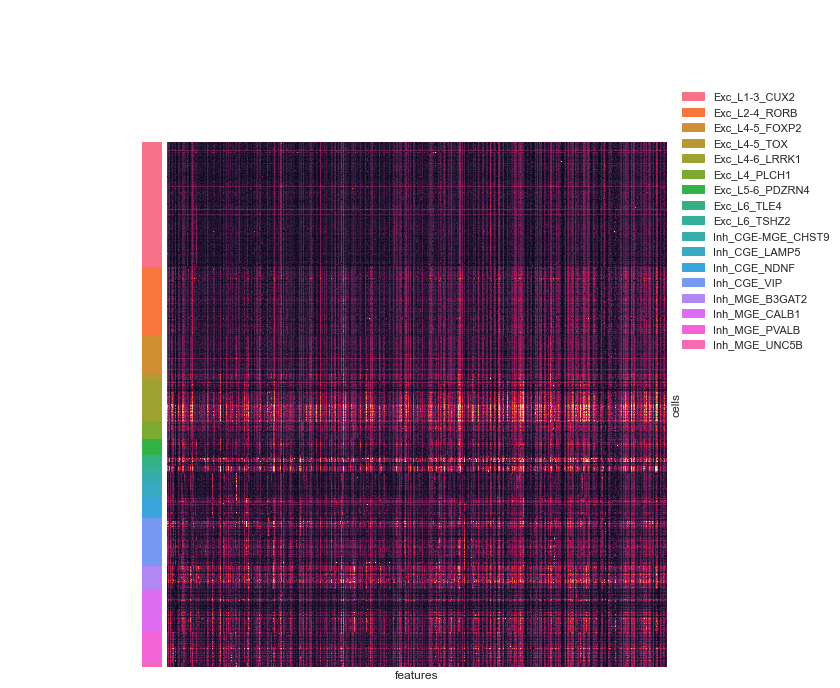

In [7]:
ngenes = 4000
g = sns.clustermap(data=E[data['sorted_highvar_T_genes']].values[:,0:ngenes],
                   row_cluster=False,
                   col_cluster=False,
                   row_colors=discrete_to_color(M['ClusterAnno'], label_order=unique_labels),
                   vmin=0, vmax=0.2, cbar_pos=None, **{'square': False})

legend_TN = [mpatches.Patch(color=c, label=l) for c,l in zip(unique_cols, unique_labels)]
g.ax_heatmap.legend(loc='center left', 
                    bbox_to_anchor=(1.01, 0.85), 
                    handles=legend_TN, 
                    frameon=False)

g.ax_heatmap.set(**{'xticks': [], 'yticks': [], 'xlabel': 'features',  'ylabel': 'cells'})
plt.show()

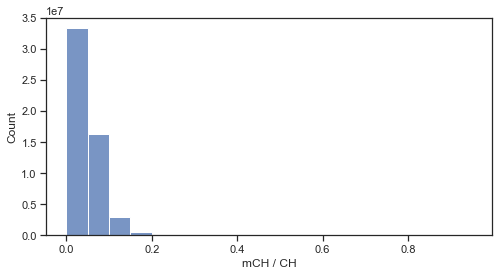

In [8]:
# distribution of relative methylation values
f, ax = plt.subplots(figsize=(8,4))
sns.histplot(x=np.ravel(E.values),bins=np.arange(-0,1,0.05))
ax.set_xlabel('mCH / CH')
plt.show()